In [36]:
import numpy as np
import os
from sympy.solvers import solve
from sympy import Symbol
from sklearn.metrics import accuracy_score

In [37]:
model_1_score=np.load("C:\\Users\\User\\Desktop\\Sugeno Integral\\Confidence Score\\PAMPA2\\PAMAP_incep.npy")
model_2_score=np.load("C:\\Users\\User\\Desktop\\Sugeno Integral\\Confidence Score\\PAMPA2\\PAMAP_resnet.npy")
model_3_score=np.load("C:\\Users\\User\\Desktop\\Sugeno Integral\\Confidence Score\\PAMPA2\\PAMAP_cus.npy")
print(model_1_score.shape)
print(model_2_score.shape)
print(model_3_score.shape)

(4259, 12)
(4259, 12)
(4259, 12)


In [38]:
y_test=np.load('C:\\Users\\User\\Desktop\\Sugeno Integral\\Confidence Score\\PAMPA2\\PAMAP_y_test.npy')
#y_test=test_data['y_test']
print(y_test.shape)

(4259,)


In [39]:
model_1_score[0]

array([0.07289543, 0.07289543, 0.07289543, 0.07289543, 0.07289543,
       0.07289543, 0.07289543, 0.07289543, 0.19815029, 0.07289543,
       0.07289543, 0.07289543], dtype=float32)

In [40]:
np.argmax(model_1_score[0])

8

In [41]:
model_1_score[0][np.argmax(model_1_score[0])]

0.19815029

In [42]:
model_2_score[0]

array([0.07289544, 0.07289544, 0.07289544, 0.07289544, 0.07289544,
       0.07289555, 0.07289544, 0.07289544, 0.19815004, 0.07289544,
       0.07289544, 0.07289544], dtype=float32)

In [43]:
np.argmax(model_2_score[0])

8

In [44]:
model_2_score[0][np.argmax(model_2_score[0])]

0.19815004

In [45]:
model_3_score[0]

array([0.07289659, 0.07289659, 0.07289667, 0.07289659, 0.07289659,
       0.07289661, 0.07289659, 0.07289669, 0.19812815, 0.07290571,
       0.07289661, 0.07289659], dtype=float32)

In [46]:
np.argmax(model_3_score[0])

8

In [47]:
model_3_score[6][np.argmax(model_3_score[0])]

0.0728955

In [48]:
0.2054, 0.1228, 0.1540

(0.2054, 0.1228, 0.154)

In [49]:
0.14609229890874442, 0.05658495837338762, 0.017328887663773163
0.17690309156082895, 0.03721539339902313, 0.01871256701027113
0.1674446621543686, 0.0403671679702553, 0.013909899823040583

(0.1674446621543686, 0.0403671679702553, 0.013909899823040583)

In [51]:
fuzzy_measure=np.array([0.17684979829991054, 0.14428416688635626, 0.3786092717685692])

In [52]:
l=Symbol('l',real=True)
lam=solve( ((1+l*fuzzy_measure[0])*(1+l*fuzzy_measure[1])*(1+l*fuzzy_measure[2]))-(1+l) , l )
lam

[-17.0494500803652, 0.0, 1.82292135461363]

In [53]:
lam=float(lam[2])
lam

1.8229213546136338

In [54]:
fuzzy_score=np.zeros(shape=model_1_score.shape, dtype=float)
fuzzy_score.shape

(4259, 12)

In [55]:
for i in range(fuzzy_score.shape[0]):
    for j in range(12):
        
        f_score=np.asarray([ model_1_score[i][j], model_2_score[i][j], model_3_score[i][j] ])
        
        permute_index=np.argsort(f_score)
        f_score_permuted=f_score[permute_index]
        fuzzy_measure_permuted=fuzzy_measure[permute_index]
        
        A_0=1.0
        A_1=( fuzzy_measure_permuted[1] + fuzzy_measure_permuted[2] + lam*fuzzy_measure_permuted[1]*fuzzy_measure_permuted[2] )
        A_2=fuzzy_measure_permuted[2]
        #print("The A_i values are {} , {}, {}".format(A_0,A_1,A_2))
        
        sugeno_score=max([ min(f_score_permuted[0],A_0), min(f_score_permuted[1],A_1), min(f_score_permuted[2],A_2) ])
        
        fuzzy_score[i][j]=sugeno_score

In [33]:
fuzzy_y_pred=np.argmax(fuzzy_score,axis=1)

In [56]:
classes_=np.load('C:\\Users\\User\\Desktop\\Sugeno Integral\\Confidence Score\\PAMPA2\\PAMAP_label_classes.npy')
classes_

array([ 1,  2,  3,  4,  5,  6,  7, 12, 13, 16, 17, 24], dtype=int64)

98.4033810753698

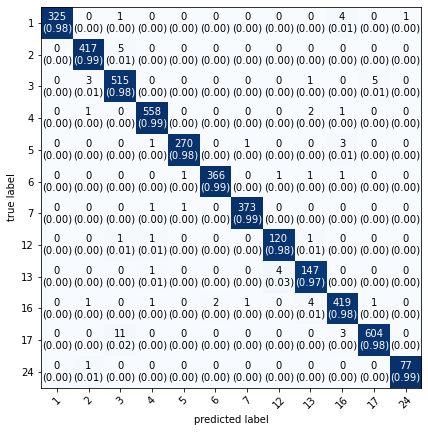

In [57]:

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
fuzzy_y_pred = np.argmax(fuzzy_score, axis=-1)
mat = confusion_matrix(y_test, fuzzy_y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=classes_, show_normed=True, figsize=(7,7))
accuracy_score(y_test,fuzzy_y_pred)*100

In [35]:
mat

array([[325,   0,   1,   0,   0,   0,   0,   0,   0,   4,   0,   1],
       [  0, 417,   5,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   3, 515,   0,   0,   0,   0,   0,   1,   0,   5,   0],
       [  0,   1,   0, 558,   0,   0,   0,   0,   2,   1,   0,   0],
       [  0,   0,   0,   1, 270,   0,   1,   0,   0,   3,   0,   0],
       [  0,   0,   0,   0,   1, 366,   0,   1,   1,   1,   0,   0],
       [  0,   0,   0,   1,   1,   0, 373,   0,   0,   0,   0,   0],
       [  0,   0,   1,   1,   0,   0,   0, 120,   1,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0,   4, 147,   0,   0,   0],
       [  0,   1,   0,   1,   0,   2,   1,   0,   4, 419,   1,   0],
       [  0,   0,  11,   0,   0,   0,   0,   0,   0,   3, 604,   0],
       [  0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,  77]],
      dtype=int64)